In [ ]:
# cca --- > complete case analysis

# df --- > missing data --- > filter missing data
# new_df = filtered_columns_in_which_we_have_missing_data

# new_df -- > missing_data_drop

# Architecture
# past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture --- >
# it means we can drop missing data .
# if past data architecture is not overlap to new data architecture --- >
# it means we can not drop missing data . we will fill missing data .

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/dsjob - dsjob.csv')

In [ ]:
df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [ ]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
271,Full time course,High School,2,never
139,Full time course,Graduate,<1,1
419,Full time course,Masters,14,never
1275,no_enrollment,Graduate,15,3
875,Full time course,Graduate,5,never


In [ ]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [ ]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

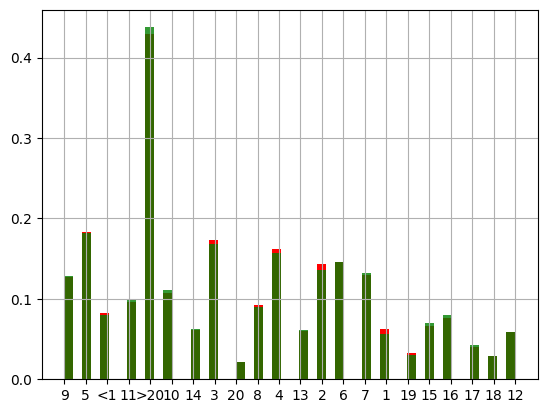

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red' )

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/titanic - titanic.csv')

In [ ]:
df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [ ]:
df = df.drop(columns=["Cabin"])

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,20.574163
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.239234


In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['Fare']

In [ ]:
df[cols].sample(5)

,Fare
140,46.9000
169,8.9625
98,7.8542
225,15.2458
122,57.7500


In [ ]:
df['Fare'].value_counts()

,count
Fare,
7.7500,21
26.0000,19
8.0500,17
13.0000,17
7.8958,11
...,...
13.8625,1
7.7208,1
90.0000,1


In [ ]:
len(df[cols].dropna())/len(df)

0.9976076555023924

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((418, 11), (417, 1))

In [ ]:
import matplotlib.pyplot as plt

<Axes: >

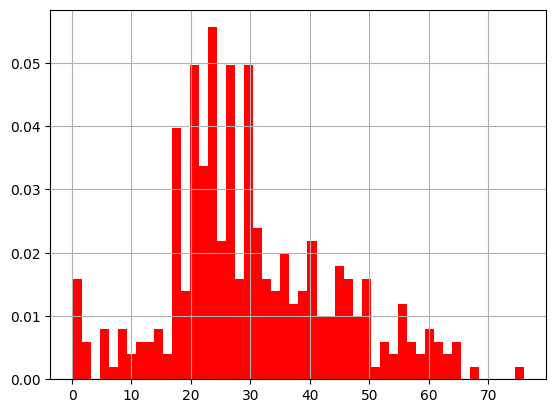

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

new_df = df.dropna(subset=['Age'])

df['Age'].hist(bins=50, ax=ax, density=True, color='red' )

new_df['Age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/covid_toy - covid_toy.csv')

In [ ]:
df.head(4)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No


In [ ]:
df.isna().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() <0.11 and df[var].isnull().mean() > 0]
cols

['fever']

In [ ]:
df[cols].sample(5)

,fever
60,102.0
9,101.0
61,98.0
10,NaN
8,100.0


In [ ]:
len(df[cols].dropna())/len(df)

0.9

In [ ]:
new_df = df[cols].dropna()
df.shape, new_df. shape

((100, 6), (90, 1))

<Axes: >

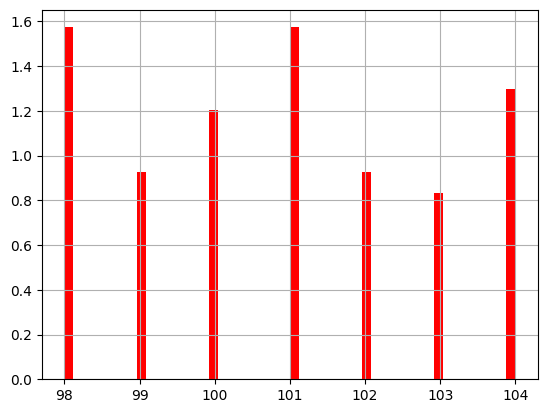

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['fever'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
 new_df['fever'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)